# Coherence as a means to reconcile fringe transmission contrasts
In order of ascending contrast, we have found that the extended source fringes had the smallest contrast, followed by the point source fringes, followed then by the internal calibration source fringes. We do not take the etalon data into account here (which obviously have the largest contrast) given that an external etalon is used to produce the fringes. We are mainly interested by the fringes/interference caused by the MIRI detectors as such. As of yet it is not clear how the fringe contrast relates to the size of the source in the pupil plane. In fact if there is a trend, it is rather strange that the MTS extended source and the internal calibration (extended) source do not look more similar in contrast. We saw however in Notebook 10 that the internal calibration source spectrum has spatial structure to it. This (explicitly) means that the source is resolvedspectrum is not flat, hence it is not uniform, hence it has less of an angle-averaging extent to it, thus the fringes are less washed out for the internal calibration source compared to the MTS extended source.

## > Import modules

In [1]:
import funcs
import mrsobs

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

## > Get data
We load the images for one band of the MRS for different kinds of sources, including: 
* MTS 800K BB extended source
* MIRI 800K BB internal calibration source
* MTS 800K BB extended source observed through 100micron pinhole 
  
Additionally the pixel-to-wavelength calibration map and the pixel-to-along-slice position map are imported.

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

# Get data
band = '1A'
ext_source_sci,ext_source_bkg           = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K')
intcal_source_sci                       = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM')
point_source_sci_p1,point_source_bkg_p1 = mrsobs.FM_MTS_800K_BB_point_source_raster(lvl2path,position='middle',pointing='P3')

# Get wavelength calibration pixel map
d2cMaps   = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
lambdaMap = d2cMaps['lambdaMap']
sliceMap  = d2cMaps['sliceMap']
nslices   = d2cMaps['nslices']

# Get spectral resolution table
specres_table = funcs.get_cdps(cdpDir=cdpDir,band=band)[4]

## > Transform data
We subtract background exposures where available.

In [3]:
# perform transform
ext_source_bkgsubtr      = ext_source_sci-ext_source_bkg
point_source_p1_bkgsubtr = point_source_sci_p1-point_source_bkg_p1

We perform an even-odd row signal correction to the data (caused by the read-out pattern of MIRI detector pixel rows).

In [4]:
ext_source_oddevencorr      = funcs.OddEvenRowSignalCorrection(ext_source_bkgsubtr)
intcal_source_oddevencorr   = funcs.OddEvenRowSignalCorrection(intcal_source_sci)
point_source_p1_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_p1_bkgsubtr)

## > Modeling
One thing we do notice however is that the trend of increasing fringe amplitude with longer wavelengths is shared in all spectra. If so, could it be that the "only thing" differentiating the MTS extended source fringe transmission from the internal calibration source fringe (for instance) be an angle-averaging effect?

In [ ]:
# pixel trace
ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_p1_oddevencorr,band,d2cMaps)

# signal normalization based on fringe profile
sel = lambdaMap[ypos_p,xpos_p]!=0
intcal_source_norm = funcs.norm_fringe(intcal_source_sci[ypos_p,xpos_p][sel],thres=0.,min_dist=6,k=3,ext=3)
ext_source_norm = funcs.norm_fringe(ext_source_oddevencorr[ypos_p,xpos_p][sel],thres=0.,min_dist=6,k=3,ext=3)

<IPython.core.display.Javascript object>


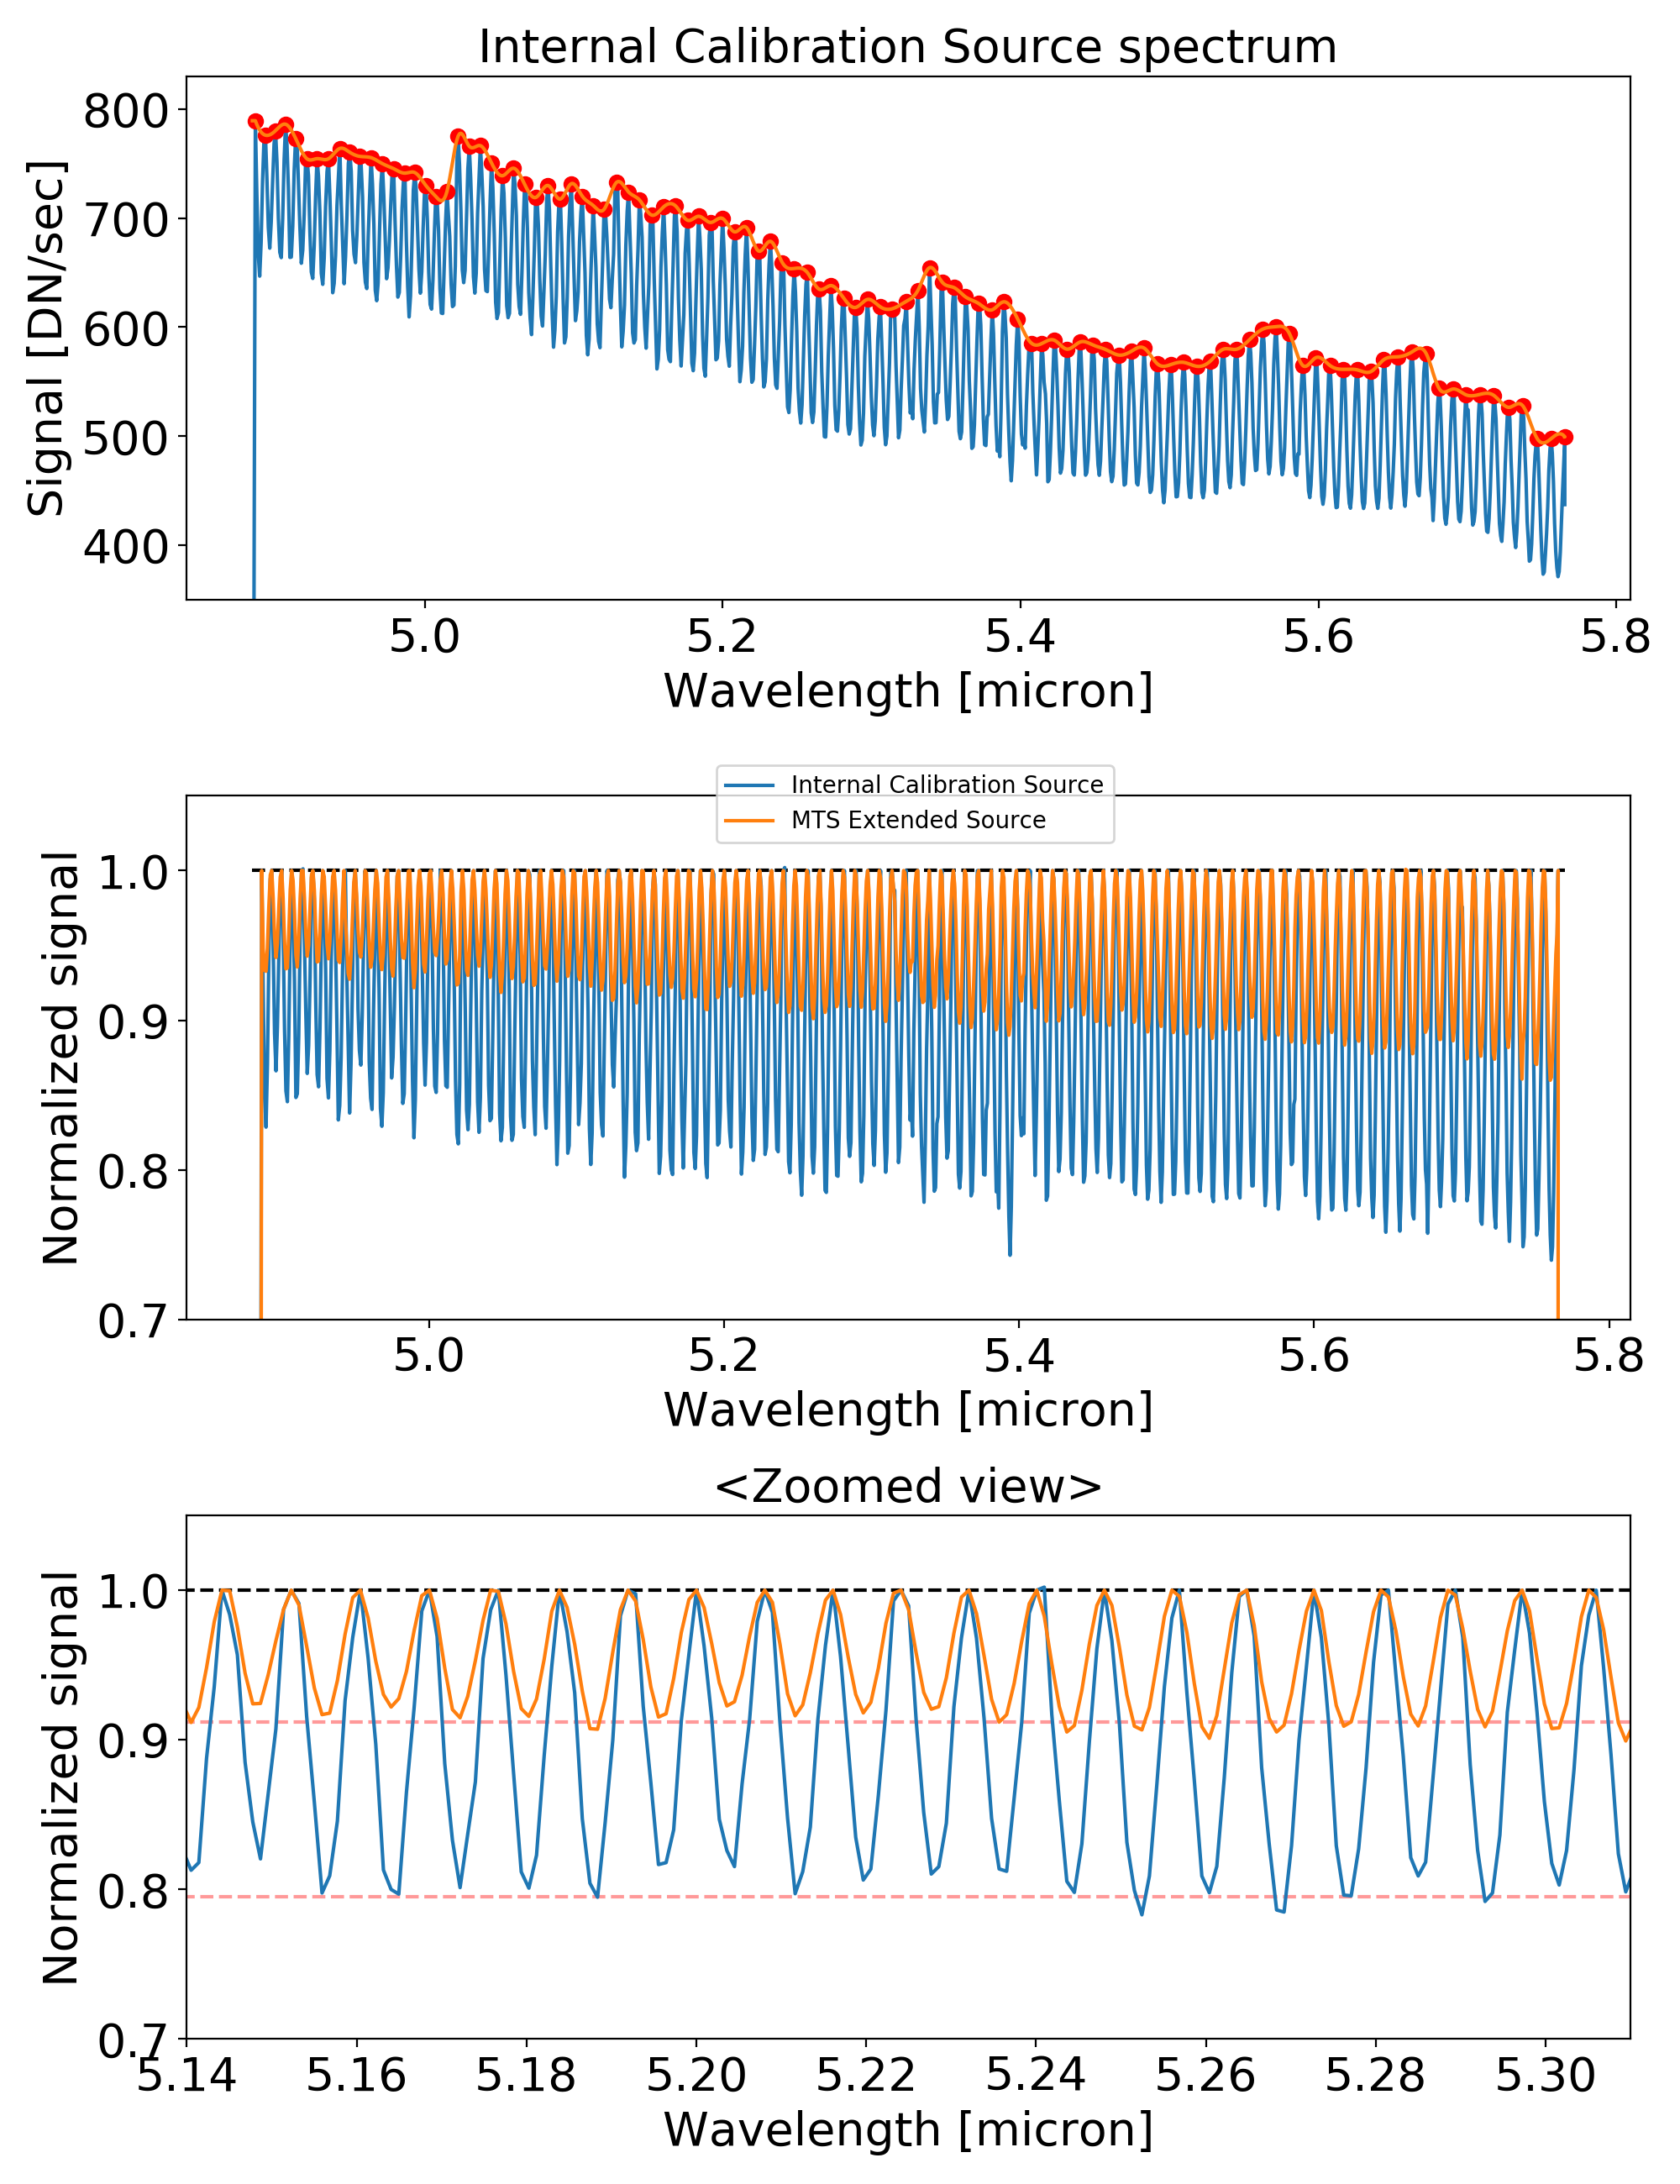

In [53]:
fig,axs = plt.subplots(3,1,figsize=(10,13))
axs[0].set_title('Internal Calibration Source spectrum')
axs[0].plot(lambdaMap[ypos_p,xpos_p][sel],intcal_source_norm[0])
axs[0].plot(lambdaMap[ypos_p,xpos_p][sel][intcal_source_norm[1]],intcal_source_norm[0][intcal_source_norm[1]],'ro')
axs[0].plot(lambdaMap[ypos_p,xpos_p][sel],intcal_source_norm[2])
axs[0].set_ylim(350,830)
axs[0].set_ylabel('Signal [DN/sec]')
for plot in range(1,3):
    axs[plot].plot(lambdaMap[ypos_p,xpos_p][sel],intcal_source_norm[0]/intcal_source_norm[2],label='Internal Calibration Source')
    axs[plot].plot(lambdaMap[ypos_p,xpos_p][sel],ext_source_norm[0]/ext_source_norm[2],label='MTS Extended Source')
    axs[plot].hlines(1,4.88,5.77,linestyle='dashed')
    axs[plot].set_ylim(0.7,1.05)
    axs[plot].set_ylabel('Normalized signal')
axs[1].legend(loc='upper right',bbox_to_anchor=(0.65,1.08),fontsize=10)
axs[2].hlines([0.795,0.912],4.88,5.77,'r',alpha=0.4,linestyle='dashed')
axs[2].set_xlim(5.14,5.31)
axs[2].set_title('<Zoomed view>')
for plot in range(3): axs[plot].set_xlabel('Wavelength [micron]')
plt.tight_layout()

## Conclusions:  

  
## Follow-up question:  
